In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

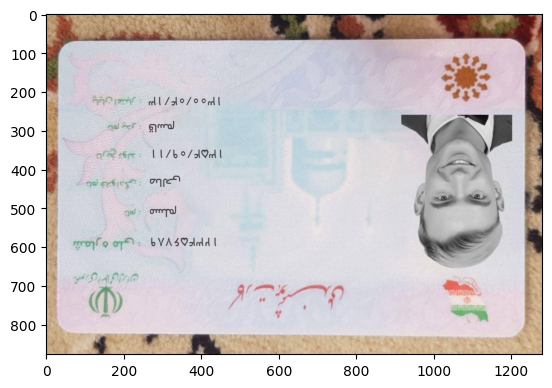

In [14]:
img = cv2.imread('Dataset/D/12.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

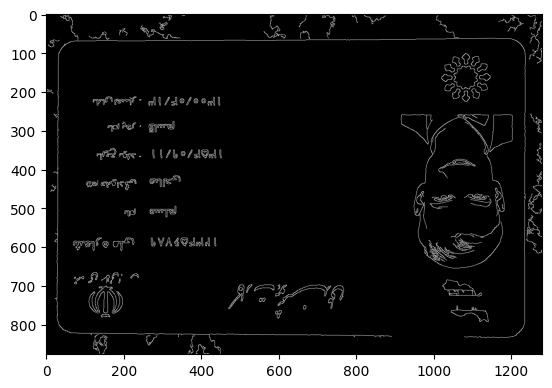

In [15]:
bilateral = cv2.bilateralFilter(gray, 11, 15, 15)
edges = cv2.Canny(bilateral, 30, 200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In [22]:
import imutils

contours  =cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_refined = imutils.grab_contours(contours)
sort = sorted(contours_refined, key=cv2.contourArea, reverse=True)[:2]

In [23]:
for cont in sort:
    approx = cv2.approxPolyDP(cont, 10, True)
    if len(approx) == 4:
        loc = approx
        break

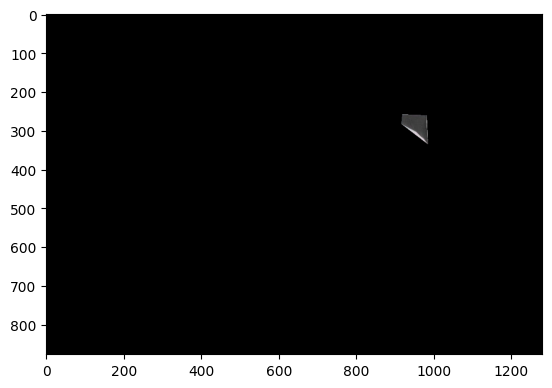

In [24]:
mask0 = np.zeros(gray.shape, np.uint8)
mask = cv2.drawContours(mask0, [loc], 0, 255, -1)
fimg = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(fimg, cv2.COLOR_BGR2RGB))